In [1]:
# Setting Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt

# For Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())

In [3]:
# Set up handles/usernames of news sources for tweets
# Set up counter for loop
# Set up array for storage of info
news_handle = ["@BBC", "@CBS", "@CNN", "@fox", "@nytimes","@enews"]
counter = 1
sentiments = []

In [4]:
# Looping through 200 most recent tweets and running sentiment analysis
for handle in news_handle:
    public_tweets = api.user_timeline(handle, count = 200)
    tweetnumber = 1       
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweetnumber
        sentiments.append({"Media Source": handle,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweetnumber})
        tweetnumber +=1
        counter +=1

Tweet 1: Justin Bieber 'engaged to Hailey Baldwin', US media say. 👉 https://t.co/j8cKfq8AtD https://t.co/HkqnZAQJi4
Tweet 2: RT @BBCBreaking: UK police launch murder inquiry after Dawn Sturgess, 44, dies after exposure to nerve agent Novichok https://t.co/adk3o7Sj…
Tweet 3: ✊🛍🛒 This family have changed their shopping habits to reduce their plastic footprint.
#PlasticsAction https://t.co/RL3U1Vk7EN
Tweet 4: ❤️ This man is cleaning all 388 Holocaust plaques in his city. https://t.co/AfdxFBxxJ4
Tweet 5: 'Did air pollution kill my daughter?' https://t.co/XzWSWFga6S
Tweet 6: The operation to free 12 boys and their coach from a cave in northern Thailand is running "smoothly", the head of t… https://t.co/fbCN1JeN1K
Tweet 7: 🎶🎻✨ Tonight, @thekatiederham introduces 2018's open-air concert from the magnificent gardens of the Schonbrunn Pala… https://t.co/AHAYPRtAJn
Tweet 8: Look back at the 2008 #Wimbledon final between @rogerfederer and @RafaelNadal, widely acknowledged as one of the gr… https:

#PlasticsAction https://t.co/4wNNoNfvPt
Tweet 199: Minimalism is not just about having few possessions. https://t.co/0rRvrVm6Sz
Tweet 200: What would happen if we knew when and how we were going to die?
👉 https://t.co/S0q9fwOYBs https://t.co/tLLJOAjuZX
Tweet 201: RT @SalvationCBS: Mark your calendars, #Salvies: Monday's new #SalvationCBS will air at a special time, 10/9c. https://t.co/RUh1J7cfj8
Tweet 202: Happy #InternationalKissingDay! See which stars we caught locking lips on the CBS Kiss Cam. 😘 https://t.co/oMPCHZlgCl
Tweet 203: Have you heard? Tonight's the first Live Show of #BB20. Grab a seat and get ready to watch the action unfold on CBS… https://t.co/0YgRV1HLGd
Tweet 204: How much does it cost to bury the truth? #OneDollar premieres Thursday, August 30, exclusively on CBS All Access.… https://t.co/1tab8eCaFz
Tweet 205: Take a first look at our @Comic_Con lineup along with details of what you can expect to see:… https://t.co/JqBtlKcwq3
Tweet 206: RT @TrueCrimeCBS: Two new true

Tweet 401: Ask President Trump's court pick whether the Bible is supreme https://t.co/4DcKzla8Lp (via @CNNOpinion) https://t.co/pwRzq5wc51
Tweet 402: Singer Justin Bieber and model Hailey Baldwin are engaged https://t.co/0dVG3qYNRr https://t.co/8urrXKVFkx
Tweet 403: Migrants describe their experiences in US custody https://t.co/p1wEg5jkxY https://t.co/EjJSyT5hxe
Tweet 404: How President Trump's former lawyer evolved on dealing with special counsel Robert Mueller https://t.co/cMvaLYUuYC https://t.co/RAL0PvYGfc
Tweet 405: What's happening this week https://t.co/TErqq4KiB7 https://t.co/4vSaMTzNGh
Tweet 406: White House fence jumper who wandered grounds arrested again nearby https://t.co/hu3tw5mxpU https://t.co/cO1orfv1bX
Tweet 407: At least 9 injured in annual Running of the Bulls in Spain https://t.co/PUoYWaaiL5 https://t.co/CL7QER9cfz
Tweet 408: Secretary of State Mike Pompeo dismisses North Korea's "gangster" comments and says talks are going well… https://t.co/QGUeTR8u8L
Tweet 409: Th

Tweet 601: @andrewvijay Everywhere to be honest. That particular one was in the US. That mostly doesn’t happen in Australia.
Tweet 602: @mctrebo Boston
Tweet 603: @LukesBeard It’s the most annoying thing that all social media, including Instagram, butchers the quality of photos… https://t.co/7y8A7IuLcT
Tweet 604: “Perks” of traveling alone as a woman: being called “honey” in all restaurants/stores, being grabbed by the arm by… https://t.co/ziCifcCI2x
Tweet 605: @mattopsahl Oh! I did go to the Boston Common and Public Garden :) will check it out!
Tweet 606: @amyngyn tbh I specifically look for “healthy” recipes because I don’t want all of the sugar / butter / cream in my… https://t.co/tEki0zBt8v
Tweet 607: Horribly jet lagged and battling anxiety, but Boston sure is pretty. ❤️ https://t.co/IYfWZjvqLe
Tweet 608: @jilljubs Omg me too but I’m also afraid
Tweet 609: Excited to be going to @xoxo this year with @benschwarz! Portland holds a dear place in my heart. 

Can’t wait to c… https://t

Tweet 801: Not long before his death, XXXTentacion signed a $10 million deal for his next album, which could still be out this… https://t.co/TLQC9VTLNq
Tweet 802: A curator has filed a complaint against MoMA PS1, saying a job offer was rescinded after she mentioned she had just… https://t.co/y2DDswKgGf
Tweet 803: Let’s Celebrate the 14th Amendment https://t.co/bh9ZJ21tcz
Tweet 804: Government Work Done, Tax Policy Writers Decamp to Lobbying Jobs https://t.co/6m4F0xizv4
Tweet 805: Scott Pruitt’s fall from the EPA is a story of his diminishing relationship with many of his closest loyalists https://t.co/wzH30eJycE
Tweet 806: RT @nytopinion: Juice contains limited nutrients and tons of sugar. In fact, one 12-ounce glass of orange juice contains 10 teaspoons of su…
Tweet 807: The Science (and the Scientists) Behind ‘Ant-Man’ https://t.co/xnMi6QmJle
Tweet 808: "Followed the recipe exactly. Perfectly done potatoes, succulent meat, crispy skin, and great overall depth of flav… https://t.co/fY

Tweet 1001: Justin Bieber Is Officially Taken! All the Women He's Romanced Over the Years https://t.co/TNPv9LoDWP
Tweet 1002: Drake Bell Visits Drake &amp; Josh House and Discovers It's Gone https://t.co/v3FlgX6gig
Tweet 1003: In 2011 Hailey Baldwin and Justin Bieber were just two teens at his Never Say Never premiere: https://t.co/FvsFqOC3lP
Tweet 1004: These future in-laws are ready: https://t.co/sxk4QpFkco
Tweet 1005: Our Savior Ariana Grande is coming to the defense of Hailey Baldwin and Justin Bieber. https://t.co/EGpxjIjI2h
Tweet 1006: Meanwhile... https://t.co/YvchbWzocR
Tweet 1007: We don't need to worry about our girl Selena. https://t.co/aQQv7Jb3Uo
Tweet 1008: Here's a guide to Hailey Baldwin and Justin Bieber's road to romance and engagement: https://t.co/pDgyB2AdfZ
Tweet 1009: We're interrupting your Sunday morning to inform you that Justin Bieber and Hailey Baldwin have gotten engaged. https://t.co/wU6tyJAF6Z
Tweet 1010: Kourtney Kardashian is celebrating her daughter's bi

In [5]:
mood_finder_df = pd.DataFrame.from_dict(sentiments)
mood_finder_df.head()
mood_finder_df["Media Source"].describe()

count     1200
unique       6
top       @BBC
freq       200
Name: Media Source, dtype: object

In [6]:
cols = list(mood_finder_df.columns.values)
print (cols)

['Compound', 'Date', 'Media Source', 'Negative', 'Neutral', 'Positive', 'Text', 'Tweet Count']


In [7]:
sentiment_csv = mood_finder_df[['Media Source','Date','Text','Compound','Positive','Neutral','Negative','Tweet Count']]#restuctur
sentiment_csv.head()

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,@BBC,Sun Jul 08 21:07:05 +0000 2018,"Justin Bieber 'engaged to Hailey Baldwin', US ...",0.4019,0.162,0.838,0.000,1
1,@BBC,Sun Jul 08 20:52:12 +0000 2018,RT @BBCBreaking: UK police launch murder inqui...,-0.6908,0.000,0.793,0.207,2
2,@BBC,Sun Jul 08 20:05:00 +0000 2018,✊🛍🛒 This family have changed their shopping ha...,0.0000,0.000,1.000,0.000,3
3,@BBC,Sun Jul 08 19:04:02 +0000 2018,❤️ This man is cleaning all 388 Holocaust plaq...,0.0000,0.000,1.000,0.000,4
4,@BBC,Sun Jul 08 18:04:02 +0000 2018,'Did air pollution kill my daughter?' https://...,-0.6908,0.000,0.561,0.439,5


In [8]:
sentiment_csv['Media Source'] = sentiment_csv['Media Source'].map(lambda x: x.lstrip('@'))
sentiment_csv.head()

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,BBC,Sun Jul 08 21:07:05 +0000 2018,"Justin Bieber 'engaged to Hailey Baldwin', US ...",0.4019,0.162,0.838,0.000,1
1,BBC,Sun Jul 08 20:52:12 +0000 2018,RT @BBCBreaking: UK police launch murder inqui...,-0.6908,0.000,0.793,0.207,2
2,BBC,Sun Jul 08 20:05:00 +0000 2018,✊🛍🛒 This family have changed their shopping ha...,0.0000,0.000,1.000,0.000,3
3,BBC,Sun Jul 08 19:04:02 +0000 2018,❤️ This man is cleaning all 388 Holocaust plaq...,0.0000,0.000,1.000,0.000,4
4,BBC,Sun Jul 08 18:04:02 +0000 2018,'Did air pollution kill my daughter?' https://...,-0.6908,0.000,0.561,0.439,5


In [9]:
sentiment_csv.to_csv("/Users/carolineteti/Sentiment_Twitter_Teti/News_Mood_Tweets.csv")

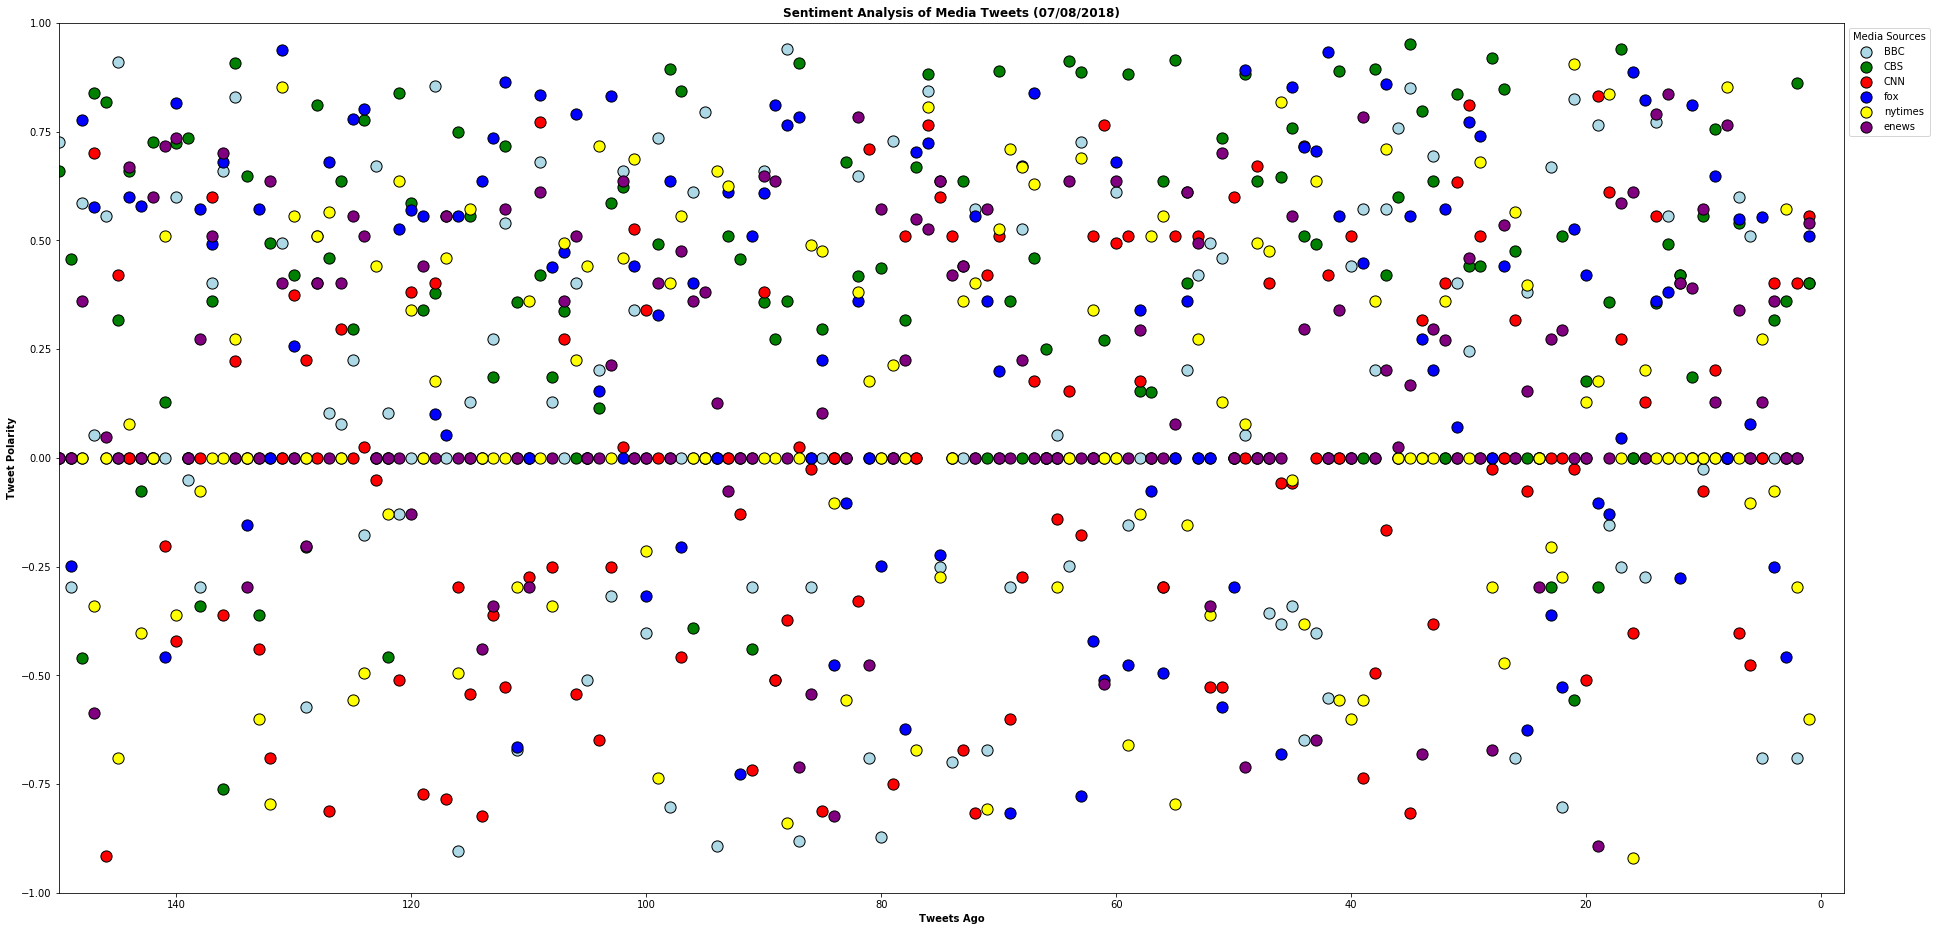

In [10]:
# Scatter Plot for Sentiment Analysis of Tweets
news_colors = {"BBC": "lightblue",
             "CBS":"green", 
             "CNN":"red",
             "fox":"blue",
             "nytimes":"yellow",
             "enews":"purple"}

plt.figure(figsize = (32,16))

plt.xlabel("Tweets Ago", fontweight = 'bold')
plt.ylabel("Tweet Polarity", fontweight = 'bold')

# Title with TimeStamp
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')

# X and Y Limits
plt.xlim(150,-2, -1)
plt.ylim(-1,1)

for newshandle in news_colors.keys():
    df = sentiment_csv[sentiment_csv['Media Source'] == newshandle]
    sentiment_analysis = plt.scatter(df["Tweet Count"],df["Compound"], label = newshandle, color = news_colors[newshandle], edgecolor = "black", s=125)

plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources')    
plt.show()

sentiment_analysis.figure.savefig('/Users/carolineteti/Sentiment_Twitter_Teti/SentimentAnalysis_Scatter.png')    

In [11]:
scoresbyhandle = sentiment_csv.groupby("Media Source")["Compound"].mean()
scoresbyhandle.head()

Media Source
BBC      0.082833
CBS      0.351216
CNN      0.019633
enews    0.158692
fox      0.221456
Name: Compound, dtype: float64

In [12]:
sentiment_csv.head()

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,BBC,Sun Jul 08 21:07:05 +0000 2018,"Justin Bieber 'engaged to Hailey Baldwin', US ...",0.4019,0.162,0.838,0.000,1
1,BBC,Sun Jul 08 20:52:12 +0000 2018,RT @BBCBreaking: UK police launch murder inqui...,-0.6908,0.000,0.793,0.207,2
2,BBC,Sun Jul 08 20:05:00 +0000 2018,✊🛍🛒 This family have changed their shopping ha...,0.0000,0.000,1.000,0.000,3
3,BBC,Sun Jul 08 19:04:02 +0000 2018,❤️ This man is cleaning all 388 Holocaust plaq...,0.0000,0.000,1.000,0.000,4
4,BBC,Sun Jul 08 18:04:02 +0000 2018,'Did air pollution kill my daughter?' https://...,-0.6908,0.000,0.561,0.439,5


In [13]:
scoresbyhandle.head()

Media Source
BBC      0.082833
CBS      0.351216
CNN      0.019633
enews    0.158692
fox      0.221456
Name: Compound, dtype: float64

In [14]:
x_axis = np.arange(len(scoresbyhandle))

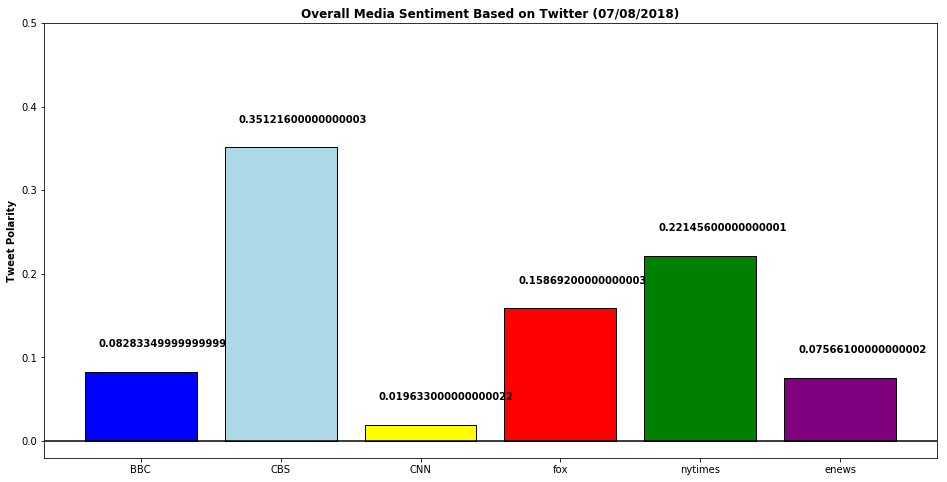

<Figure size 432x288 with 0 Axes>

In [15]:

plt.figure(figsize = (16,8))

plt.bar(x_axis, scoresbyhandle, label = newshandle, 
        color = {"lightblue","green","yellow","red","blue","purple"}, 
        edgecolor = "black")

plt.ylim(-.02,.5)
plt.ylabel("Tweet Polarity", fontweight='bold')
plt.axhline(y = 0, color = 'black') 

for i, v in enumerate(scoresbyhandle):
    plt.text(i-.3, v+.03, str(v).format(), color = 'black', fontweight = 'bold')

plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),
          fontweight = 'bold')

x_labels = ["BBC", "CBS", "CNN", "fox", "nytimes","enews"]
x_locations = [value for value in np.arange(6)]

plt.xticks(x_locations, x_labels)

plt.show()

plt.savefig('/Users/carolineteti/Sentiment_Twitter_Teti/SentimentAnalysis.png')